# Wimbledon

In [37]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client['Tennis'] 
Wimbledon=db['Wimbledon']

In [23]:
for doc in Wimbledon.find():
    if doc.get('player1', {}).get('Rank').isdigit():
        new_rank1 = int(doc['player1']['Rank'])
        Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player1.Rank': new_rank1}})
    
    if doc.get('player2', {}).get('Rank').isdigit():
        new_rank2 = int(doc['player2']['Rank'])
        Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player2.Rank': new_rank2}})

In [219]:
result=list(Wimbledon.find({'match type':'1/8 Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_ottavi=[]
for partita in result:
    ranking_ottavi.append(partita['player1']['Rank'])
    ranking_ottavi.append(partita['player2']['Rank'])
result=list(Wimbledon.find({'match type':'Quarter-Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_quarti=[]
for partita in result:
    ranking_quarti.append(partita['player1']['Rank'])
    ranking_quarti.append(partita['player2']['Rank'])
result=list(Wimbledon.find({'match type':'Semi-final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_semi=[]
for partita in result:
    ranking_semi.append(partita['player1']['Rank'])
    ranking_semi.append(partita['player2']['Rank'])
result=list(Wimbledon.find({'match type':'Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_final=[]
for partita in result:
    ranking_final.append(partita['player1']['Rank'])
    ranking_final.append(partita['player2']['Rank'])
    
lista_Wimbledon=[ranking_ottavi, ranking_quarti, ranking_semi, ranking_final]

Trasformo year of birth in int

In [31]:
for doc in Wimbledon.find():
    if 'year of birth' in doc['player1']:
        if doc.get('player1', {}).get('year of birth').isdigit():
            new_rank1 = int(doc['player1']['year of birth'])
            Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player1.year of birth': new_rank1}})

        if doc.get('player2', {}).get('year of birth').isdigit():
            new_rank2 = int(doc['player2']['year of birth'])
            Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player2.year of birth': new_rank2}})

AttributeError: 'int' object has no attribute 'isdigit'

In [35]:
for doc in Wimbledon.find():
        if doc.get('player1', {}).get('year').isdigit():
            new_rank1 = int(doc['player1']['year'])
            Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player1.year': new_rank1}})

        if doc.get('player2', {}).get('year').isdigit():
            new_rank2 = int(doc['player2']['year'])
            Wimbledon.update_one({'_id': doc['_id']}, {'$set': {'player2.year': new_rank2}})

In [116]:
lista_winner=[]
for m in Wimbledon.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
giovani_quarti={}
for nome in lista_winner:
    name=str(nome)
    result= list(Wimbledon.find({
    '$and': [
        {
            '$or': [
                {'match type': 'Final'},
                {'match type': 'Semi-final'},
                {'match type': 'Quarter-Final'},
                {'match type': '1/8 Final'}
            ]
        },
        {'player1.Rank': {'$ne': 'Not in Top 100'}},
        {'player2.Rank': {'$ne': 'Not in Top 100'}},
        {
            '$or': [
                {
                    'player1.Name Formatted': name,
                    'winner': name,
                    '$expr': { 
                        '$and': [
                            {'$gt': ['$player1.Rank', '$player2.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player1.year'}, 25]},
                                {'$toInt': '$player1.year of birth'}
                            ]}
                        ]
                    }
                },
                {
                    'player2.Name Formatted': name,
                    'winner': name,
                    '$expr': {
                        '$and': [
                            {'$gt': ['$player2.Rank', '$player1.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player2.year'}, 25]},
                                {'$toInt': '$player2.year of birth'}
                            ]}
                        ]
                    }
                }
            ]
        }
    ]
}))
    if len(result)>0:
        giovani_quarti[nome, len(result)]=result
giovani_quarti

{('Shapovalov D.',
  1): [{'_id': ObjectId('668aa2dcc71a9a9e51d4d4c3'),
   'match type': '1/8 Final',
   'player1': {'_id': ObjectId('668aa2dec71a9a9e51d4d967'),
    'Name': 'Denis Shapovalov',
    'Rank': 14,
    'Name Formatted': 'Shapovalov D.',
    'year': 2021,
    'backhand': 'One-Handed Backhand',
    'hand': 'Left-Handed',
    'height': '185',
    'turned pro': '2017',
    'weight': '75',
    'year of birth': '1999'},
   'player2': {'_id': ObjectId('668aa2dec71a9a9e51d4d963'),
    'Name': 'Roberto Bautista Agut',
    'Rank': 10,
    'Name Formatted': 'Bautista-Agut R.',
    'year': 2021,
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '183',
    'turned pro': '2005',
    'weight': '75',
    'year of birth': '1988'},
   'points_p1': ['6', '6', '7'],
   'points_p2': ['1', '3', '5'],
   'winner': 'Shapovalov D.',
   'year': '2021'}],
 ('Dimitrov G.',
  1): [{'_id': ObjectId('668aa2dcc71a9a9e51d4d809'),
   'match type': 'Quarter-Final',
   'player1'

In [117]:
lista_nomi=[]
dizionario={}
for player in giovani_quarti:
    dizionario[player[0]]=player[1]
    lista_nomi.append(player[0])      

In [270]:
finali_W={}
result=list(Wimbledon.find({'match type':'Final'}))
for match in result:
    anno=match['year']
    winner=match['winner']
    if winner==match['player1']['Name Formatted']:
        rank=match['player1']['Rank']
        eta=int(anno)-int(match['player1']['year of birth'])
    else:
        rank=match['player2']['Rank']
        eta=int(anno)-int(match['player2']['year of birth'])
    finali_W[anno]=[winner, eta, rank]

finali_R={}
result=list(Rolland.find({'match type':'Final'}))
for match in result:
    anno=match['year']
    winner=match['winner']
    if winner==match['player1']['Name Formatted']:
        rank=match['player1']['Rank']
        eta=int(anno)-int(match['player1']['year of birth'])
    else:
        rank=match['player2']['Rank']
        eta=int(anno)-int(match['player2']['year of birth'])
    finali_R[anno]=[winner, eta, rank]

finali_AUS={}
result=list(AUS.find({'match type':'Final'}))
for match in result:
    anno=match['year']
    winner=match['winner']
    if winner==match['player1']['Name Formatted']:
        rank=match['player1']['Rank']
        eta=int(anno)-int(match['player1']['year of birth'])
    else:
        rank=match['player2']['Rank']
        eta=int(anno)-int(match['player2']['year of birth'])
    finali_AUS[anno]=[winner, eta, rank]
    
finali_US={}
result=list(US.find({'match type':'Final'}))
for match in result:
    anno=match['year']
    winner=match['winner']
    if winner==match['player1']['Name Formatted']:
        rank=match['player1']['Rank']
        eta=int(anno)-int(match['player1']['year of birth'])
    else:
        rank=match['player2']['Rank']
        eta=int(anno)-int(match['player2']['year of birth'])
    finali_US[anno]=[winner, eta, rank]

In [291]:
finali_W

{'2023': ['Alcaraz C.', 20, 2],
 '2022': ['Djokovic N.', 35, 1],
 '2021': ['Djokovic N.', 34, 1],
 '2019': ['Djokovic N.', 32, 1],
 '2018': ['Djokovic N.', 31, 21],
 '2017': ['Federer R.', 36, 5],
 '2016': ['Murray A.', 29, 2],
 '2015': ['Djokovic N.', 28, 1],
 '2014': ['Djokovic N.', 27, 2]}

In [245]:
lista_winner=[]
for m in Rolland.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
prova_U={}
for nome in lista_winner:
    name=str(nome)
    result=list(Rolland.find({
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'},
                    '$or' : [
                       {'player1.Name Formatted':name, 'winner':name,'player1.Rank':{'$gt':20},'player2.Rank':{'$lt':10}, '$expr': {'$gt': ['$player1.Rank', '$player2.Rank']}},
                       {'player2.Name Formatted': name, 'winner':name,'player2.Rank':{'$gt':20},'player1.Rank':{'$lt':10},'$expr': {'$gt': ['$player2.Rank', '$player1.Rank']}}
                   ]}))
    if len(result)>0:
        
        for partita in result:
            prova_U[nome]=len(result)
                
prova_U
   


{'Andujar P.': 1,
 'Cilic M.': 2,
 'Altmaier D.': 1,
 'Wawrinka S.': 1,
 'Garcia-Lopez G.': 1,
 'Struff J-L.': 1,
 'Bublik A.': 1,
 'Cerundolo F.': 1,
 'Sinner J.': 1,
 'Sonego L.': 1,
 'Rune H.': 1,
 'Fucsovics M.': 1,
 'Musetti L.': 1,
 'Arnaldi M.': 1,
 'Verdasco F.': 1}

# Rolland upsets

In [17]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client['Tennis'] 
Rolland = db['Rolland Garros']

In [158]:
lista_winner=[]
for m in Rolland.find():
    lista_winner.append(m['winner'])
prova_R={}
for nome in lista_winner:
    name=str(nome)
    result=list(Rolland.find({
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'},
                    '$or' : [
                       {'player1.Name Formatted':name, 'winner':name,'player1.Rank':{'$gt':10},'player2.Rank':{'$lt':11}, '$expr': {'$gt': ['$player1.Rank', '$player2.Rank']}},
                       {'player2.Name Formatted': name, 'winner':name,'player2.Rank':{'$gt':10},'player1.Rank':{'$lt':11},'$expr': {'$gt': ['$player2.Rank', '$player1.Rank']}}
                   ]}))
    if len(result)>0:
        prova_R[nome]=len(result)
prova_R

{'Sinner J.': 3,
 'Altmaier D.': 1,
 'Khachanov K.': 1,
 'Carreno-Busta P.': 1,
 'Rune H.': 1,
 'Gulbis E.': 2,
 'Sonego L.': 1,
 'Tsonga J-W.': 2,
 'Cerundolo F.': 1,
 'Bublik A.': 1,
 'Cecchinato M.': 1,
 'Wawrinka S.': 1,
 'Fucsovics M.': 1,
 'Arnaldi M.': 1,
 'Andujar P.': 1,
 'Gasquet R.': 1,
 'Cilic M.': 2,
 'Struff J-L.': 1,
 'De Minaur A.': 1,
 'Schwartzman D.': 2,
 'Ramos A.': 1,
 'Garcia-Lopez G.': 1,
 'Verdasco F.': 1,
 'Musetti L.': 1}

In [220]:
result=list(Rolland.find({'match type':'1/8 Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_ottavi=[]
for partita in result:
    ranking_ottavi.append(partita['player1']['Rank'])
    ranking_ottavi.append(partita['player2']['Rank'])
result=list(Rolland.find({'match type':'Quarter-Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_quarti=[]
for partita in result:
    ranking_quarti.append(partita['player1']['Rank'])
    ranking_quarti.append(partita['player2']['Rank'])
result=list(Rolland.find({'match type':'Semi-final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_semi=[]
for partita in result:
    ranking_semi.append(partita['player1']['Rank'])
    ranking_semi.append(partita['player2']['Rank'])
result=list(Rolland.find({'match type':'Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_final=[]
for partita in result:
    ranking_final.append(partita['player1']['Rank'])
    ranking_final.append(partita['player2']['Rank'])
    
lista_Rolland=[ranking_ottavi, ranking_quarti, ranking_semi, ranking_final]

In [71]:
for doc in Rolland.find():
    if 'year of birth' in doc['player1']:
        if doc.get('player1', {}).get('year of birth').isdigit():
            new_rank1 = int(doc['player1']['year of birth'])
            Rolland.update_one({'_id': doc['_id']}, {'$set': {'player1.year of birth': new_rank1}})

        if doc.get('player2', {}).get('year of birth').isdigit():
            new_rank2 = int(doc['player2']['year of birth'])
            Rolland.update_one({'_id': doc['_id']}, {'$set': {'player2.year of birth': new_rank2}})

AttributeError: 'NoneType' object has no attribute 'isdigit'

In [73]:
for doc in Rolland.find():
        if doc.get('player1', {}).get('year').isdigit():
            new_rank1 = int(doc['player1']['year'])
            Rolland.update_one({'_id': doc['_id']}, {'$set': {'player1.year': new_rank1}})

        if doc.get('player2', {}).get('year').isdigit():
            new_rank2 = int(doc['player2']['year'])
            Rolland.update_one({'_id': doc['_id']}, {'$set': {'player2.year': new_rank2}})

AttributeError: 'NoneType' object has no attribute 'isdigit'

In [119]:
lista_winner=[]
for m in Rolland.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
giovani_quarti={}
for nome in lista_winner:
    name=str(nome)
    result= list(Rolland.find({
    '$and': [
        {
            '$or': [
                {'match type': 'Final'},
                {'match type': 'Semi-final'},
                {'match type': 'Quarter-Final'},
                {'match type': '1/8 Final'}
            ]
        },
        {'player1.Rank': {'$ne': 'Not in Top 100'}},
        {'player2.Rank': {'$ne': 'Not in Top 100'}},
        {
            '$or': [
                {
                    'player1.Name Formatted': name,
                    'winner': name,
                    '$expr': { 
                        '$and': [
                            {'$gt': ['$player1.Rank', '$player2.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player1.year'}, 25]},
                                {'$toInt': '$player1.year of birth'}
                            ]}
                        ]
                    }
                },
                {
                    'player2.Name Formatted': name,
                    'winner': name,
                    '$expr': {
                        '$and': [
                            {'$gt': ['$player2.Rank', '$player1.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player2.year'}, 25]},
                                {'$toInt': '$player2.year of birth'}
                            ]}
                        ]
                    }
                }
            ]
        }
    ]
}))
    if len(result)>0:
        giovani_quarti[nome, len(result)]=result
giovani_quarti

{('Khachanov K.',
  1): [{'_id': ObjectId('668aa3a399fd11e9d8b45d59'),
   'match type': '1/8 Final',
   'player1': {'_id': ObjectId('668aa3cc99fd11e9d8b4624c'),
    'Name': 'Karen Khachanov',
    'Rank': 13,
    'Name Formatted': 'Khachanov K.',
    'year': '2019',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '198',
    'turned pro': '2013',
    'weight': '87',
    'year of birth': '1996'},
   'player2': {'_id': ObjectId('668aa3cc99fd11e9d8b46247'),
    'Name': 'Juan Martin Del Potro',
    'Rank': 8,
    'Name Formatted': 'Del Potro J.',
    'year': '2019',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '198',
    'turned pro': '2005',
    'weight': '97',
    'year of birth': '1988'},
   'points_p1': ['7', '6', '3', '6'],
   'points_p2': ['5', '3', '6', '3'],
   'winner': 'Khachanov K.',
   'year': '2019'}],
 ('Etcheverry T. M.',
  1): [{'_id': ObjectId('668aa3a399fd11e9d8b45b5d'),
   'match type': '1/8 Final',
   'p

In [120]:
lista_nomi_R=[]
dizionario_R={}
for player in giovani_quarti:
    dizionario_R[player[0]]=player[1]
    lista_nomi_R.append(player[0])  

In [121]:
dizionario_R

{'Khachanov K.': 1,
 'Etcheverry T. M.': 1,
 'Tsitsipas S.': 1,
 'Sinner J.': 2,
 'Thiem D.': 2,
 'Rune H.': 1,
 'Musetti L.': 1,
 'Alcaraz C.': 1}

# AUS upstes

In [2]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client['Tennis'] 
AUS=db['AUS Open']

Trasfromare Rank in int

In [ ]:
for doc in AUS.find():
    if doc.get('player1', {}).get('Rank').isdigit():
        new_rank1 = int(doc['player1']['Rank'])
        AUS.update_one({'_id': doc['_id']}, {'$set': {'player1.Rank': new_rank1}})
    
    if doc.get('player2', {}).get('Rank').isdigit():
        new_rank2 = int(doc['player2']['Rank'])
        AUS.update_one({'_id': doc['_id']}, {'$set': {'player2.Rank': new_rank2}})

Lista Upsets

In [170]:
lista_winner=[]
for m in AUS.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
prova_A={}
for nome in lista_winner:
    name=str(nome)
    result=list(AUS.find({
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'},
                    '$or' : [
                       {'player1.Name Formatted':name, 'winner':name,'player1.Rank':{'$gt':10},'player2.Rank':{'$lt':11}, '$expr': {'$gt': ['$player1.Rank', '$player2.Rank']}},
                       {'player2.Name Formatted': name, 'winner':name,'player2.Rank':{'$gt':10},'player1.Rank':{'$lt':11},'$expr': {'$gt': ['$player2.Rank', '$player1.Rank']}}
                   ]}))
    if len(result)>0:
        prova_A[nome]=len(result)
prova_A

{'Raonic M.': 2,
 'Dimitrov G.': 1,
 'Edmund K.': 1,
 'Benneteau J.': 1,
 'Goffin D.': 1,
 'Sugita Y.': 1,
 'Evans D.': 1,
 'Tsitsipas S.': 1,
 'Wawrinka S.': 1,
 'Seppi A.': 1,
 'Federer R.': 4,
 'Mannarino A.': 1,
 'Sandgren T.': 3,
 'Shapovalov D.': 1,
 'Bautista-Agut R.': 2,
 'Cilic M.': 2,
 'Robredo T.': 1,
 'McDonald M.': 1,
 'Lehecka J.': 1,
 'Korda S.': 2,
 'Tiafoe F.': 1,
 'Verdasco F.': 1,
 'Brooksby J.': 1}

In [221]:
result=list(AUS.find({'match type':'1/8 Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_ottavi=[]
for partita in result:
    ranking_ottavi.append(partita['player1']['Rank'])
    ranking_ottavi.append(partita['player2']['Rank'])
result=list(AUS.find({'match type':'Quarter-Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_quarti=[]
for partita in result:
    ranking_quarti.append(partita['player1']['Rank'])
    ranking_quarti.append(partita['player2']['Rank'])
result=list(AUS.find({'match type':'Semi-final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_semi=[]
for partita in result:
    ranking_semi.append(partita['player1']['Rank'])
    ranking_semi.append(partita['player2']['Rank'])
result=list(AUS.find({'match type':'Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_final=[]
for partita in result:
    ranking_final.append(partita['player1']['Rank'])
    ranking_final.append(partita['player2']['Rank'])
    
lista_AUS=[ranking_ottavi, ranking_quarti, ranking_semi, ranking_final]

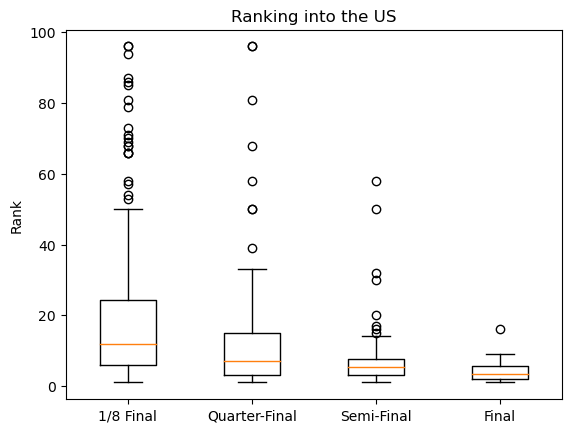

In [5]:
import matplotlib.pyplot as plt

plt.boxplot([ranking_ottavi, ranking_quarti, ranking_semi, ranking_final])

plt.xticks([1, 2, 3, 4], ['1/8 Final', 'Quarter-Final', 'Semi-Final', 'Final'])
plt.ylabel('Rank')
plt.title('Ranking into the AUS')

plt.show()

In [8]:
lista_AUS=[ranking_ottavi, ranking_quarti, ranking_semi, ranking_final]

In [78]:
for doc in AUS.find():
    if 'year of birth' in doc['player1']:
        if doc.get('player1', {}).get('year of birth').isdigit():
            new_rank1 = int(doc['player1']['year of birth'])
            AUS.update_one({'_id': doc['_id']}, {'$set': {'player1.year of birth': new_rank1}})

        if doc.get('player2', {}).get('year of birth').isdigit():
            new_rank2 = int(doc['player2']['year of birth'])
            AUS.update_one({'_id': doc['_id']}, {'$set': {'player2.year of birth': new_rank2}})

AttributeError: 'NoneType' object has no attribute 'isdigit'

In [79]:
for doc in AUS.find():
        if doc.get('player1', {}).get('year').isdigit():
            new_rank1 = int(doc['player1']['year'])
            AUS.update_one({'_id': doc['_id']}, {'$set': {'player1.year': new_rank1}})

        if doc.get('player2', {}).get('year').isdigit():
            new_rank2 = int(doc['player2']['year'])
            AUS.update_one({'_id': doc['_id']}, {'$set': {'player2.year': new_rank2}})

AttributeError: 'NoneType' object has no attribute 'isdigit'

In [122]:
lista_winner=[]
for m in AUS.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
giovani_quarti={}
for nome in lista_winner:
    name=str(nome)
    result= list(AUS.find({
    '$and': [
        {
            '$or': [
                {'match type': 'Final'},
                {'match type': 'Semi-final'},
                {'match type': 'Quarter-Final'},
                {'match type': '1/8 Final'}
            ]
        },
        {'player1.Rank': {'$ne': 'Not in Top 100'}},
        {'player2.Rank': {'$ne': 'Not in Top 100'}},
        {
            '$or': [
                {
                    'player1.Name Formatted': name,
                    'winner': name,
                    '$expr': { 
                        '$and': [
                            {'$gt': ['$player1.Rank', '$player2.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player1.year'}, 25]},
                                {'$toInt': '$player1.year of birth'}
                            ]}
                        ]
                    }
                },
                {
                    'player2.Name Formatted': name,
                    'winner': name,
                    '$expr': {
                        '$and': [
                            {'$gt': ['$player2.Rank', '$player1.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player2.year'}, 25]},
                                {'$toInt': '$player2.year of birth'}
                            ]}
                        ]
                    }
                }
            ]
        }
    ]
}))
    if len(result)>0:
        giovani_quarti[nome, len(result)]=result
giovani_quarti

{('Kyrgios N.',
  1): [{'_id': ObjectId('668a9c5ae169e56598eadfb6'),
   'match type': '1/8 Final',
   'player1': {'_id': ObjectId('668a9c5ee169e56598eae47d'),
    'Name': 'Nick Kyrgios',
    'Rank': 50,
    'Name Formatted': 'Kyrgios N.',
    'year': '2015',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '193',
    'turned pro': '2013',
    'weight': '85',
    'year of birth': '1995'},
   'player2': {'_id': ObjectId('668a9c5ee169e56598eae478'),
    'Name': 'Andreas Seppi',
    'Rank': 45,
    'Name Formatted': 'Seppi A.',
    'year': '2015',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '191',
    'turned pro': '2002',
    'weight': '78',
    'year of birth': '1984'},
   'points_p1': ['5', '4', '6', '7(7)', '8'],
   'points_p2': ['7', '6', '3', '6(5)', '6'],
   'winner': 'Kyrgios N.',
   'year': '2015'}],
 ('Shelton B.',
  1): [{'_id': ObjectId('668a9c5ae169e56598eadb4c'),
   'match type': '1/8 Final',
   'player1': {

In [123]:
lista_nomi_AUS=[]
dizionario_AUS={}
for player in giovani_quarti:
    dizionario_AUS[player[0]]=player[1]
    lista_nomi_AUS.append(player[0])  

# US upstes

In [6]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client['Tennis'] 
US=db['US Open']

In [ ]:
for doc in US.find():
    if doc.get('player1', {}).get('Rank').isdigit():
        new_rank1 = int(doc['player1']['Rank'])
        US.update_one({'_id': doc['_id']}, {'$set': {'player1.Rank': new_rank1}})
    
    if doc.get('player2', {}).get('Rank').isdigit():
        new_rank2 = int(doc['player2']['Rank'])
        US.update_one({'_id': doc['_id']}, {'$set': {'player2.Rank': new_rank2}})

In [227]:
result=list(US.find({'match type':'1/8 Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_ottavi=[]
for partita in result:
    ranking_ottavi.append(partita['player1']['Rank'])
    ranking_ottavi.append(partita['player2']['Rank'])
statistics.mean(ranking_ottavi)



22.919117647058822

In [228]:
result=list(US.find({'match type':'Quarter-Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_quarti=[]
for partita in result:
    ranking_quarti.append(partita['player1']['Rank'])
    ranking_quarti.append(partita['player2']['Rank'])
statistics.mean(ranking_quarti)

15.157894736842104

In [229]:
result=list(US.find({'match type':'Semi-final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_semi=[]
for partita in result:
    ranking_semi.append(partita['player1']['Rank'])
    ranking_semi.append(partita['player2']['Rank'])
statistics.mean(ranking_semi)

11.3

In [230]:
result=list(US.find({'match type':'Final',
                              'player1.Rank' : {'$ne' : 'Not in Top 100'},
                              'player2.Rank' : {'$ne' : 'Not in Top 100'}}))

import statistics
ranking_final=[]
for partita in result:
    ranking_final.append(partita['player1']['Rank'])
    ranking_final.append(partita['player2']['Rank'])
statistics.mean(ranking_final)

6.25

In [231]:
lista_US=[ranking_ottavi, ranking_quarti, ranking_semi, ranking_final]

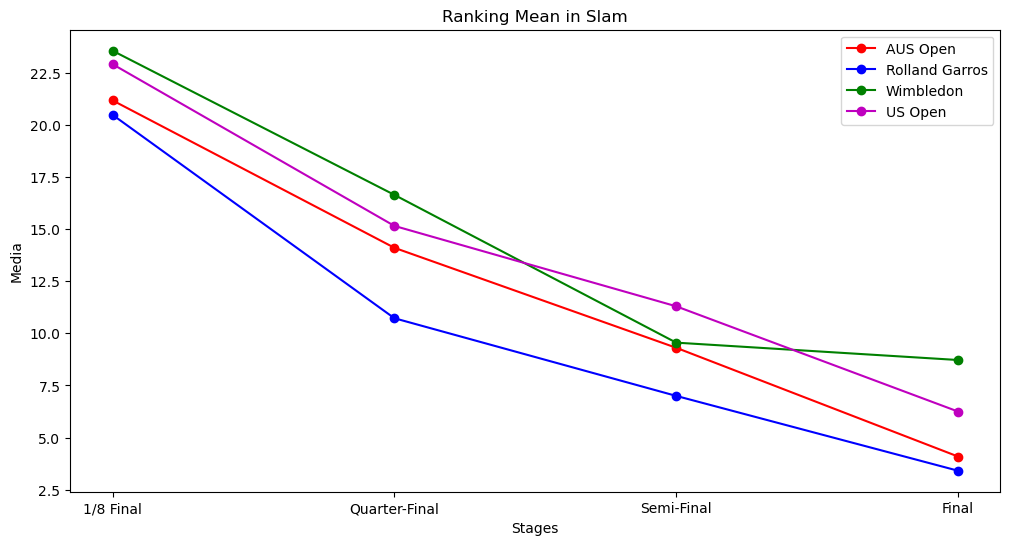

In [233]:
import matplotlib.pyplot as plt

nomi_liste = ['1/8 Final', 'Quarter-Final', 'Semi-Final', 'Final']

medie_torneo1 = [sum(lista) / len(lista) for lista in lista_AUS]
medie_torneo2 = [sum(lista) / len(lista) for lista in lista_Rolland]
medie_torneo3 = [sum(lista) / len(lista) for lista in lista_Wimbledon]
medie_torneo4 = [sum(lista) / len(lista) for lista in lista_US]

plt.figure(figsize=(12, 6))

plt.plot(nomi_liste, medie_torneo1, 'ro-', label='AUS Open')
plt.plot(nomi_liste, medie_torneo2, 'bo-', label='Rolland Garros')
plt.plot(nomi_liste, medie_torneo3, 'go-', label='Wimbledon')
plt.plot(nomi_liste, medie_torneo4, 'mo-', label='US Open')

plt.title('Ranking Mean in Slam')
plt.xlabel('Stages')
plt.ylabel('Media')
plt.legend()

plt.savefig('grafico_medie_tornei.png', format='png')

plt.show()

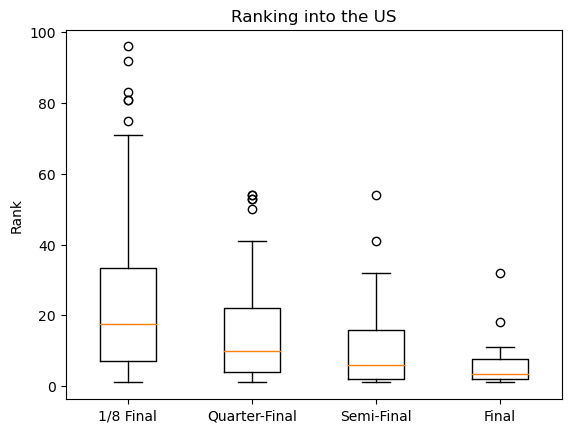

In [205]:
import matplotlib.pyplot as plt

# Crea un boxplot
plt.boxplot([ranking_ottavi, ranking_quarti, ranking_semi, ranking_final])

# Aggiungi etichette agli assi
plt.xticks([1, 2, 3, 4], ['1/8 Final', 'Quarter-Final', 'Semi-Final', 'Final'])
plt.ylabel('Rank')
plt.title('Ranking into the US')

# Mostra il grafico
plt.show()


In [30]:
players=db['Overview']
overview_data = players.find_one()

In [44]:
lista_winner=list(set(lista_winner))
lista_winner

['Sinner J.',
 'Kuznetsov An.',
 'Fratangelo B.',
 'Kukushkin M.',
 'Andreozzi G.',
 'Zeppieri G.',
 'Nishikori K.',
 'Karatsev A.',
 'Raonic M.',
 'Vesely J.',
 'Janowicz J.',
 'Rosol L.',
 'Delbonis F.',
 'Altmaier D.',
 'Kolar Z.',
 'Kotov P.',
 'Khachanov K.',
 'Dimitrov G.',
 'Tomic B.',
 'Donaldson J.',
 'Anderson K.',
 'Nakashima B.',
 'Bagnis F.',
 'Zeballos H.',
 'De Jong J.',
 'Murray A.',
 'Giron M.',
 'Edmund K.',
 'Benneteau J.',
 'Young D.',
 'Borges N.',
 'Gabashvili T.',
 'Norrie C.',
 'Carreno-Busta P.',
 'Berrettini M.',
 'Rune H.',
 'Machac T.',
 'Martinez P.',
 'Duckworth J.',
 'Safiullin R.',
 'Gombos N.',
 'Mahut N.',
 'Trungelliti M.',
 'Mathieu P.',
 'Matosevic M.',
 'Haider-Maurer A.',
 'Gulbis E.',
 'Navone M.',
 'Michon A.',
 'Simon G.',
 'Baghdatis M.',
 'Youzhny M.',
 'Varillas J. P.',
 'Van De Zandschulp B.',
 'Albot R.',
 'Almagro N.',
 'Haas T.',
 'Nishioka Y.',
 'Gonzalez A.',
 'Nieminen J.',
 'Humbert U.',
 'Medvedev D.',
 'Bedene A.',
 'Lajovic D.',
 

In [104]:
numero_upsets_2022={}
for nome in lista_winner:
    result = list(Rolland.find({'player1.Rank' : {'$ne':'Not in Top 100'}, 'player2.Rank' : {'$ne':'Not in Top 100'}}, {
                          '$or' :[{'winner':str(nome), 'player2.Name Formatted':str(nome), 'player2.Rank':{'$lt':'player1.Rank'}},
                                  {'winner':str(nome), 'player1.Name Formatted':str(nome),'player1.Rank':{'$lt':'player2.Rank'}}]}))
    numero_upsets_2022[nome]=len(result)

OperationFailure: FieldPath field names may not contain '.'. Consider using $getField or $setField., full error: {'ok': 0.0, 'errmsg': "FieldPath field names may not contain '.'. Consider using $getField or $setField.", 'code': 16412, 'codeName': 'Location16412'}

In [96]:
    numero_upsets_2022

{'Sinner J.': 0,
 'Kuznetsov An.': 0,
 'Fratangelo B.': 0,
 'Kukushkin M.': 0,
 'Andreozzi G.': 0,
 'Zeppieri G.': 0,
 'Nishikori K.': 0,
 'Karatsev A.': 0,
 'Raonic M.': 0,
 'Vesely J.': 0,
 'Janowicz J.': 0,
 'Rosol L.': 0,
 'Delbonis F.': 0,
 'Altmaier D.': 0,
 'Kolar Z.': 0,
 'Kotov P.': 0,
 'Khachanov K.': 0,
 'Dimitrov G.': 0,
 'Tomic B.': 0,
 'Donaldson J.': 0,
 'Anderson K.': 0,
 'Nakashima B.': 0,
 'Bagnis F.': 0,
 'Zeballos H.': 0,
 'De Jong J.': 0,
 'Murray A.': 0,
 'Giron M.': 0,
 'Edmund K.': 0,
 'Benneteau J.': 0,
 'Young D.': 0,
 'Borges N.': 0,
 'Gabashvili T.': 0,
 'Norrie C.': 0,
 'Carreno-Busta P.': 0,
 'Berrettini M.': 0,
 'Rune H.': 0,
 'Machac T.': 0,
 'Martinez P.': 0,
 'Duckworth J.': 0,
 'Safiullin R.': 0,
 'Gombos N.': 0,
 'Mahut N.': 0,
 'Trungelliti M.': 0,
 'Mathieu P.': 0,
 'Matosevic M.': 0,
 'Haider-Maurer A.': 0,
 'Gulbis E.': 0,
 'Navone M.': 0,
 'Michon A.': 0,
 'Simon G.': 0,
 'Baghdatis M.': 0,
 'Youzhny M.': 0,
 'Varillas J. P.': 0,
 'Van De Zandsc

In [90]:
match_collection=db['Rolland Garros']

In [91]:
for doc in match_collection.find():
    if doc.get('player1', {}).get('Rank').isdigit():
        new_rank1 = int(doc['player1']['Rank'])
        match_collection.update_one({'_id': doc['_id']}, {'$set': {'player1.Rank': new_rank1}})
    
    if doc.get('player2', {}).get('Rank').isdigit():
        new_rank2 = int(doc['player2']['Rank'])
        match_collection.update_one({'_id': doc['_id']}, {'$set': {'player2.Rank': new_rank2}})

# Chiudere la connessione a MongoDB
client.close()

In [92]:
Rolland=db['Rolland Garros']

In [ ]:
for doc in US.find():
    if 'year of birth' in doc['player1']:
        if doc.get('player1', {}).get('year of birth').isdigit():
            new_rank1 = int(doc['player1']['year of birth'])
            US.update_one({'_id': doc['_id']}, {'$set': {'player1.year of birth': new_rank1}})

        if doc.get('player2', {}).get('year of birth').isdigit():
            new_rank2 = int(doc['player2']['year of birth'])
            US.update_one({'_id': doc['_id']}, {'$set': {'player2.year of birth': new_rank2}})

In [ ]:
for doc in US.find():
        if doc.get('player1', {}).get('year').isdigit():
            new_rank1 = int(doc['player1']['year'])
            US.update_one({'_id': doc['_id']}, {'$set': {'player1.year': new_rank1}})

        if doc.get('player2', {}).get('year').isdigit():
            new_rank2 = int(doc['player2']['year'])
            US.update_one({'_id': doc['_id']}, {'$set': {'player2.year': new_rank2}})

In [124]:
lista_winner=[]
for m in US.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
giovani_quarti={}
for nome in lista_winner:
    name=str(nome)
    result= list(US.find({
    '$and': [
        {
            '$or': [
                {'match type': 'Final'},
                {'match type': 'Semi-final'},
                {'match type': 'Quarter-Final'},
                {'match type': '1/8 Final'}
            ]
        },
        {'player1.Rank': {'$ne': 'Not in Top 100'}},
        {'player2.Rank': {'$ne': 'Not in Top 100'}},
        {
            '$or': [
                {
                    'player1.Name Formatted': name,
                    'winner': name,
                    '$expr': { 
                        '$and': [
                            {'$gt': ['$player1.Rank', '$player2.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player1.year'}, 25]},
                                {'$toInt': '$player1.year of birth'}
                            ]}
                        ]
                    }
                },
                {
                    'player2.Name Formatted': name,
                    'winner': name,
                    '$expr': {
                        '$and': [
                            {'$gt': ['$player2.Rank', '$player1.Rank']},
                            {'$lt': [
                                {'$subtract': [{'$toInt': '$player2.year'}, 25]},
                                {'$toInt': '$player2.year of birth'}
                            ]}
                        ]
                    }
                }
            ]
        }
    ]
}))
    if len(result)>0:
        giovani_quarti[nome, len(result)]=result
giovani_quarti

{('Shelton B.',
  2): [{'_id': ObjectId('668a9f60b8e1d224ac109560'),
   'match type': 'Quarter-Final',
   'player1': {'_id': ObjectId('668a9f86b8e1d224ac109a81'),
    'Name': 'Frances Tiafoe',
    'Rank': 10,
    'Name Formatted': 'Tiafoe F.',
    'year': '2023',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Right-Handed',
    'height': '188',
    'turned pro': '2015',
    'weight': '86',
    'year of birth': '1998'},
   'player2': {'_id': ObjectId('668a9f86b8e1d224ac109aa0'),
    'Name': 'Ben Shelton',
    'Rank': 41,
    'Name Formatted': 'Shelton B.',
    'year': '2023',
    'backhand': 'Two-Handed Backhand',
    'hand': 'Left-Handed',
    'height': '193',
    'turned pro': '2022',
    'weight': '88',
    'year of birth': '2002'},
   'points_p1': ['2', '6', '6(7)', '2'],
   'points_p2': ['6', '3', '7(9)', '6'],
   'winner': 'Shelton B.',
   'year': '2023'}, {'_id': ObjectId('668a9f60b8e1d224ac109569'),
   'match type': '1/8 Final',
   'player1': {'_id': ObjectId('668a9f86b8e1d

In [125]:
lista_nomi_US=[]
dizionario_US={}
for player in giovani_quarti:
    dizionario_US[player[0]]=player[1]
    lista_nomi_US.append(player[0])  

In [126]:
diz_totale={}
lista_totale=lista_nomi+lista_nomi_R+lista_nomi_AUS+lista_nomi_US
lista_totale=list(set(lista_totale))
for play in lista_totale:
    diz_totale[play] = (dizionario[play] if play in dizionario else 0) + \
                       (dizionario_R[play] if play in dizionario_R else 0) + \
                       (dizionario_AUS[play] if play in dizionario_AUS else 0) + \
                       (dizionario_US[play] if play in dizionario_US else 0)
diz_totale

{'Rune H.': 1,
 'Kyrgios N.': 1,
 'Lehecka J.': 1,
 'Hurkacz H.': 2,
 'Korda S.': 1,
 'Shelton B.': 3,
 'Shapovalov D.': 3,
 'Sinner J.': 5,
 'Dimitrov G.': 1,
 'Khachanov K.': 1,
 'Tsitsipas S.': 3,
 'Thiem D.': 2,
 'Musetti L.': 1,
 'Tiafoe F.': 3,
 'Alcaraz C.': 2,
 'Etcheverry T. M.': 1,
 'Chung H.': 1,
 'Berrettini M.': 1,
 'Rublev A.': 2,
 'Pouille L.': 2,
 'Edmund K.': 1,
 'Harris L.': 1,
 'Auger-Aliassime F.': 1}

In [129]:
partite_giocatori={}
for nome in lista_totale:
    result=list(AUS.find({ '$and':[{
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}]},
       { '$or':[
            {'player1.Name Formatted':str(nome)},
            {'player2.Name Formatted': str(nome)}  
        ]}]}
    
    ))
    partite_giocatori[nome]=len(result)

In [130]:
for nome in lista_totale:
    result=list(Wimbledon.find({ '$and':[{
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}]},
       { '$or':[
            {'player1.Name Formatted':str(nome)},
            {'player2.Name Formatted': str(nome)}  
        ]}]}
    
    ))
    partite_giocatori[nome]=partite_giocatori[nome]+len(result)

In [131]:
for nome in lista_totale:
    result=list(Rolland.find({ '$and':[{
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}]},
       { '$or':[
            {'player1.Name Formatted':str(nome)},
            {'player2.Name Formatted': str(nome)}  
        ]}]}
    
    ))
    partite_giocatori[nome]=partite_giocatori[nome]+len(result)

In [134]:
partite_giocatori

{'Rune H.': 8,
 'Kyrgios N.': 12,
 'Lehecka J.': 3,
 'Hurkacz H.': 9,
 'Korda S.': 3,
 'Shelton B.': 5,
 'Shapovalov D.': 8,
 'Sinner J.': 23,
 'Dimitrov G.': 25,
 'Khachanov K.': 18,
 'Tsitsipas S.': 29,
 'Thiem D.': 33,
 'Musetti L.': 2,
 'Tiafoe F.': 10,
 'Alcaraz C.': 25,
 'Etcheverry T. M.': 2,
 'Chung H.': 3,
 'Berrettini M.': 20,
 'Rublev A.': 23,
 'Pouille L.': 8,
 'Edmund K.': 4,
 'Harris L.': 2,
 'Auger-Aliassime F.': 12}

In [132]:
for nome in lista_totale:
    result=list(US.find({ '$and':[{
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}]},
       { '$or':[
            {'player1.Name Formatted':str(nome)},
            {'player2.Name Formatted': str(nome)}  
        ]}]}
    
    ))
    partite_giocatori[nome]=partite_giocatori[nome]+len(result)

In [133]:
vinte_giocatori={}
for nome in lista_totale:
    result=list(AUS.find({
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}],
        'winner' : str(nome)
        }
    
    ))
    vinte_giocatori[nome]=len(result)

{'Rune H.': 0,
 'Kyrgios N.': 1,
 'Lehecka J.': 1,
 'Hurkacz H.': 1,
 'Korda S.': 1,
 'Shelton B.': 1,
 'Shapovalov D.': 1,
 'Sinner J.': 5,
 'Dimitrov G.': 5,
 'Khachanov K.': 2,
 'Tsitsipas S.': 8,
 'Thiem D.': 3,
 'Musetti L.': 0,
 'Tiafoe F.': 1,
 'Alcaraz C.': 1,
 'Etcheverry T. M.': 0,
 'Chung H.': 2,
 'Berrettini M.': 2,
 'Rublev A.': 3,
 'Pouille L.': 2,
 'Edmund K.': 2,
 'Harris L.': 0,
 'Auger-Aliassime F.': 1}

In [135]:
for nome in lista_totale:
    result=list(US.find({
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}],
        'winner' : str(nome)
        }
    
    ))
    vinte_giocatori[nome]=vinte_giocatori[nome]+len(result)

In [136]:
for nome in lista_totale:
    result=list(Rolland.find({
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}],
        'winner' : str(nome)
        }
    
    ))
    vinte_giocatori[nome]=vinte_giocatori[nome]+len(result)

In [137]:
for nome in lista_totale:
    result=list(Wimbledon.find({
        '$or': [{'match type':'Final'},{'match type':'Semi-final'},{'match type':'Quarter-Final'}, {'match type':'1/8 Final'}],
        'winner' : str(nome)
        }
    
    ))
    vinte_giocatori[nome]=vinte_giocatori[nome]+len(result)

In [138]:
vinte_giocatori

{'Rune H.': 3,
 'Kyrgios N.': 5,
 'Lehecka J.': 1,
 'Hurkacz H.': 3,
 'Korda S.': 1,
 'Shelton B.': 3,
 'Shapovalov D.': 4,
 'Sinner J.': 13,
 'Dimitrov G.': 10,
 'Khachanov K.': 7,
 'Tsitsipas S.': 15,
 'Thiem D.': 19,
 'Musetti L.': 1,
 'Tiafoe F.': 4,
 'Alcaraz C.': 19,
 'Etcheverry T. M.': 1,
 'Chung H.': 2,
 'Berrettini M.': 9,
 'Rublev A.': 9,
 'Pouille L.': 4,
 'Edmund K.': 2,
 'Harris L.': 1,
 'Auger-Aliassime F.': 4}

In [140]:
perc_vittoria={}
for nome in lista_totale:
    perc_vittoria[nome]=vinte_giocatori[nome]/partite_giocatori[nome]
perc_vittoria

{'Rune H.': 0.375,
 'Kyrgios N.': 0.4166666666666667,
 'Lehecka J.': 0.3333333333333333,
 'Hurkacz H.': 0.3333333333333333,
 'Korda S.': 0.3333333333333333,
 'Shelton B.': 0.6,
 'Shapovalov D.': 0.5,
 'Sinner J.': 0.5652173913043478,
 'Dimitrov G.': 0.4,
 'Khachanov K.': 0.3888888888888889,
 'Tsitsipas S.': 0.5172413793103449,
 'Thiem D.': 0.5757575757575758,
 'Musetti L.': 0.5,
 'Tiafoe F.': 0.4,
 'Alcaraz C.': 0.76,
 'Etcheverry T. M.': 0.5,
 'Chung H.': 0.6666666666666666,
 'Berrettini M.': 0.45,
 'Rublev A.': 0.391304347826087,
 'Pouille L.': 0.5,
 'Edmund K.': 0.5,
 'Harris L.': 0.5,
 'Auger-Aliassime F.': 0.3333333333333333}

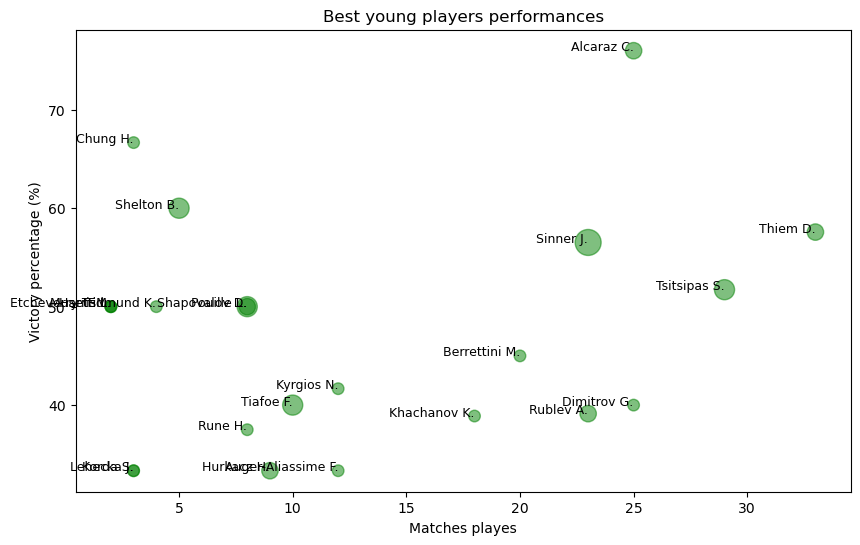

In [205]:
import matplotlib.pyplot as plt

# Preparare i dati per il grafico
x = []  # Numero di partite giocate
y = []  # Percentuale di vittoria
sizes = []  # Numero di vittorie contro avversari più forti
labels = []  # Nomi dei giocatori
colors = []  # Colori dei punti in base alle vittorie

for player in perc_vittoria:
    if player in partite_giocatori and player in diz_totale:
        x.append(partite_giocatori[player])
        y.append(perc_vittoria[player] * 100)  # Convertire la percentuale in %
        sizes.append(diz_totale[player] * 70) 
        labels.append(player)
        

# Creare il grafico scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes,color='green', alpha=0.5)

# Aggiungere i nomi dei giocatori accanto ai punti
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right')

plt.title('Best young players performances')
plt.xlabel('Matches playes')
plt.ylabel('Victory percentage (%)')
plt.savefig('grafico_u25.png', format='png')
# Mostrare il grafico
plt.show()


In [161]:
lista_R=[]
lista_winner=[]
for m in Rolland.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
vittorie_u30={}
for nome in lista_winner:
    name=str(nome)
    result= list(Rolland.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        vittorie_u30[nome]=len(result)
        lista_R.append(nome)

In [160]:
lista_winner=[]
lista_W=[]
for m in Wimbledon.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
vittorie_u30_W={}
for nome in lista_winner:
    name=str(nome)
    result= list(Wimbledon.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        vittorie_u30_W[nome]=len(result)
        lista_W.append(nome)

In [162]:
lista_AUS=[]
lista_winner=[]
for m in AUS.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
vittorie_u30_AUS={}
for nome in lista_winner:
    name=str(nome)
    result= list(AUS.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        vittorie_u30_AUS[nome]=len(result)
        lista_AUS.append(nome)

In [163]:
lista_US=[]
lista_winner=[]
for m in US.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
vittorie_u30_US={}
for nome in lista_winner:
    name=str(nome)
    result= list(US.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                'winner': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        vittorie_u30_US[nome]=len(result)
        lista_US.append(nome)

In [164]:
diz_vittorie_tot={}
lista_totale=lista_W+lista_R+lista_AUS+lista_US
lista_totale=list(set(lista_totale))
for play in lista_totale:
    diz_vittorie_tot[play] = (vittorie_u30_US[play] if play in vittorie_u30_US else 0) + \
                       (vittorie_u30_AUS[play] if play in vittorie_u30_AUS else 0) + \
                       (vittorie_u30[play] if play in vittorie_u30 else 0) + \
                       (vittorie_u30_W[play] if play in vittorie_u30_W else 0)
diz_vittorie_tot

{'Shevchenko A.': 2,
 'Ruud C.': 40,
 'Muller A.': 1,
 'Gaston H.': 4,
 'Safiullin R.': 5,
 'Brooksby J.': 6,
 'Lehecka J.': 9,
 'Opelka R.': 12,
 'Rune H.': 19,
 'Munar J.': 7,
 'Bublik A.': 17,
 'Cobolli F.': 1,
 'Altmaier D.': 4,
 'van Assche L.': 3,
 'Purcell M.': 2,
 'Popyrin A.': 8,
 'Korda S.': 17,
 'Hurkacz H.': 31,
 'Shelton B.': 14,
 'Draper J.': 7,
 'Cerundolo F.': 11,
 'Shapovalov D.': 35,
 'Sinner J.': 51,
 'Borges N.': 4,
 'Kotov P.': 3,
 'Baez S.': 8,
 'Davidovich Fokina A.': 23,
 'Navone M.': 1,
 'Humbert U.': 11,
 'Marozsan F.': 4,
 'Tsitsipas S.': 64,
 'Musetti L.': 15,
 'Nakashima B.': 9,
 'De Minaur A.': 40,
 'Machac T.': 4,
 'Paul T.': 26,
 'Ymer M.': 6,
 'Darderi L.': 1,
 'Wolf J.J.': 6,
 'Tiafoe F.': 40,
 'Arnaldi M.': 8,
 'Fils A.': 2,
 'Kwon S.': 6,
 'Zverev A.': 89,
 'Zapata Miralles B.': 1,
 'Alcaraz C.': 49,
 'Etcheverry T. M.': 10,
 'Molcan A.': 6,
 'Rublev A.': 59,
 'Michelsen A.': 2,
 'Moutet C.': 11,
 'Ymer E.': 1,
 'Ruusuvuori E.': 8,
 'Fritz T.': 42,
 

In [167]:
lista_R=[]
lista_winner=[]
for m in Rolland.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
partite_u30={}
for nome in lista_winner:
    name=str(nome)
    result= list(Rolland.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        partite_u30[nome]=len(result)
        lista_R.append(nome)

In [168]:
lista_W=[]
lista_winner=[]
for m in Wimbledon.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
partite_u30_W={}
for nome in lista_winner:
    name=str(nome)
    result= list(Wimbledon.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        partite_u30_W[nome]=len(result)
        lista_W.append(nome)

In [169]:
lista_AUS=[]
lista_winner=[]
for m in AUS.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
partite_u30_AUS={}
for nome in lista_winner:
    name=str(nome)
    result= list(AUS.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        partite_u30_AUS[nome]=len(result)
        lista_AUS.append(nome)

In [170]:
lista_US=[]
lista_winner=[]
for m in US.find():
    lista_winner.append(m['winner'])
lista_winner=list(set(lista_winner))
partite_u30_US={}
for nome in lista_winner:
    name=str(nome)
    result= list(US.find({
        '$or': [
            {
                'player1.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player1.year of birth'}, 1996]},
                        0
                    ]
                }
            },
            {
                'player2.Name Formatted': name,
                '$expr': {
                    '$gt': [
                        {'$subtract': [{'$toInt': '$player2.year of birth'}, 1996]},
                        0
                    ]
                }
            }
        ]
    }))
    if len(result)>0:
        partite_u30_US[nome]=len(result)
        lista_US.append(nome)

In [171]:
diz_partite_tot={}
lista_totale=lista_W+lista_R+lista_AUS+lista_US
lista_totale=list(set(lista_totale))
for play in lista_totale:
    diz_partite_tot[play] = (partite_u30_US[play] if play in partite_u30_US else 0) + \
                       (partite_u30_AUS[play] if play in partite_u30_AUS else 0) + \
                       (partite_u30[play] if play in partite_u30 else 0) + \
                       (partite_u30_W[play] if play in partite_u30_W else 0)
diz_partite_tot

{'Shevchenko A.': 4,
 'Ruud C.': 60,
 'Muller A.': 4,
 'Gaston H.': 10,
 'Safiullin R.': 10,
 'Brooksby J.': 9,
 'Lehecka J.': 15,
 'Opelka R.': 25,
 'Rune H.': 30,
 'Popyrin A.': 21,
 'Munar J.': 23,
 'Bublik A.': 37,
 'Cobolli F.': 2,
 'Altmaier D.': 9,
 'Purcell M.': 5,
 'van Assche L.': 6,
 'Watanuki Y.': 1,
 'Korda S.': 29,
 'Hurkacz H.': 52,
 'Shelton B.': 20,
 'Draper J.': 10,
 'Cerundolo F.': 20,
 'Shapovalov D.': 58,
 'Sinner J.': 66,
 'Borges N.': 8,
 'Kotov P.': 5,
 'Hijikata R.': 1,
 'Baez S.': 18,
 'Davidovich Fokina A.': 39,
 'Navone M.': 2,
 'Humbert U.': 32,
 'Marozsan F.': 7,
 'Tsitsipas S.': 91,
 'Musetti L.': 27,
 'Nakashima B.': 17,
 'De Minaur A.': 63,
 'Machac T.': 7,
 'Paul T.': 42,
 'Ymer M.': 12,
 'Darderi L.': 2,
 'Wolf J.J.': 11,
 'Tiafoe F.': 68,
 'Arnaldi M.': 12,
 'Fils A.': 4,
 'Kwon S.': 19,
 'Zverev A.': 119,
 'Zapata Miralles B.': 4,
 'Alcaraz C.': 57,
 'Etcheverry T. M.': 20,
 'Molcan A.': 13,
 'Rublev A.': 82,
 'Michelsen A.': 3,
 'Moutet C.': 25,
 '

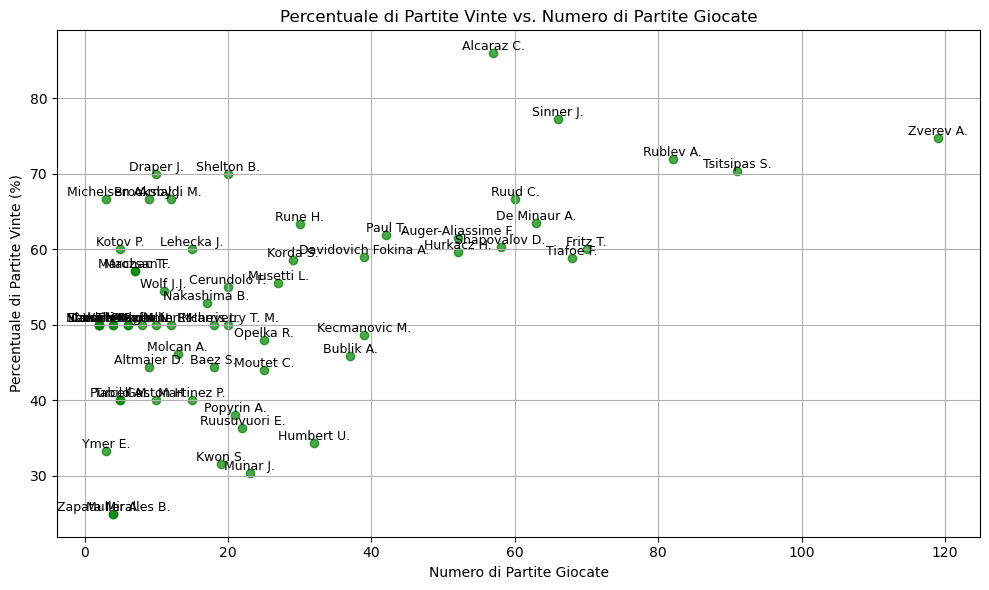

In [204]:
giocatori_comuni = set(diz_partite_tot.keys()).intersection(diz_vittorie_tot.keys())

# Preparare i dati per il grafico
partite_giocate_values = [diz_partite_tot[giocatore] for giocatore in giocatori_comuni]
partite_vinte_values = [diz_vittorie_tot[giocatore] for giocatore in giocatori_comuni]

# Calcolare la percentuale di partite vinte
percentuale_vittorie = [(vinte / giocate) * 100 for vinte, giocate in zip(partite_vinte_values, partite_giocate_values)]

# Creare il grafico scatter
plt.figure(figsize=(10, 6))
plt.scatter(partite_giocate_values, percentuale_vittorie, color='green', alpha=0.7)

# Aggiungere i nomi dei giocatori accanto ai punti
for i, nome in enumerate(giocatori_comuni):
    plt.text(partite_giocate_values[i], percentuale_vittorie[i], nome, fontsize=9, ha='center', va='bottom')

# Aggiungere titoli e etichette agli assi
plt.title('Percentuale di Partite Vinte vs. Numero di Partite Giocate')
plt.xlabel('Numero di Partite Giocate')
plt.ylabel('Percentuale di Partite Vinte (%)')

# Mostrare il grafico
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_u25.png', format='png')
plt.show()

In [181]:
giocatori_comuni

{'Alcaraz C.',
 'Altmaier D.',
 'Arnaldi M.',
 'Auger-Aliassime F.',
 'Baez S.',
 'Borges N.',
 'Brooksby J.',
 'Bublik A.',
 'Cerundolo F.',
 'Cobolli F.',
 'Cressy M.',
 'Darderi L.',
 'Davidovich Fokina A.',
 'De Minaur A.',
 'Draper J.',
 'Etcheverry T. M.',
 'Fils A.',
 'Fritz T.',
 'Gaston H.',
 'Harris L.',
 'Humbert U.',
 'Hurkacz H.',
 'Kecmanovic M.',
 'Korda S.',
 'Kotov P.',
 'Kwon S.',
 'Lehecka J.',
 'Machac T.',
 'Marozsan F.',
 'Martinez P.',
 'Michelsen A.',
 'Molcan A.',
 'Moutet C.',
 'Muller A.',
 'Munar J.',
 'Musetti L.',
 'Nakashima B.',
 'Navone M.',
 'Opelka R.',
 'Paul T.',
 'Popyrin A.',
 'Purcell M.',
 'Rublev A.',
 'Rune H.',
 'Ruud C.',
 'Ruusuvuori E.',
 'Safiullin R.',
 'Shapovalov D.',
 'Shelton B.',
 'Shevchenko A.',
 'Sinner J.',
 'Tabilo A.',
 'Tiafoe F.',
 'Tsitsipas S.',
 'Wolf J.J.',
 'Wu Y.',
 'Ymer E.',
 'Ymer M.',
 'Zapata Miralles B.',
 'Zverev A.',
 'van Assche L.'}

In [195]:
pros={}
for nome in giocatori_comuni:
    if nome not in pros:
        for match in AUS.find():
            if 'Name Formatted' in match['player1']:
                if match['player1']['Name Formatted']==nome:
                    pros[nome]=int(match['player1']['turned pro'])
            if 'Name Formatted' in match['player2']:
                if match['player2']['Name Formatted']==nome:
                    pros[nome]=int(match['player2']['turned pro'])
   

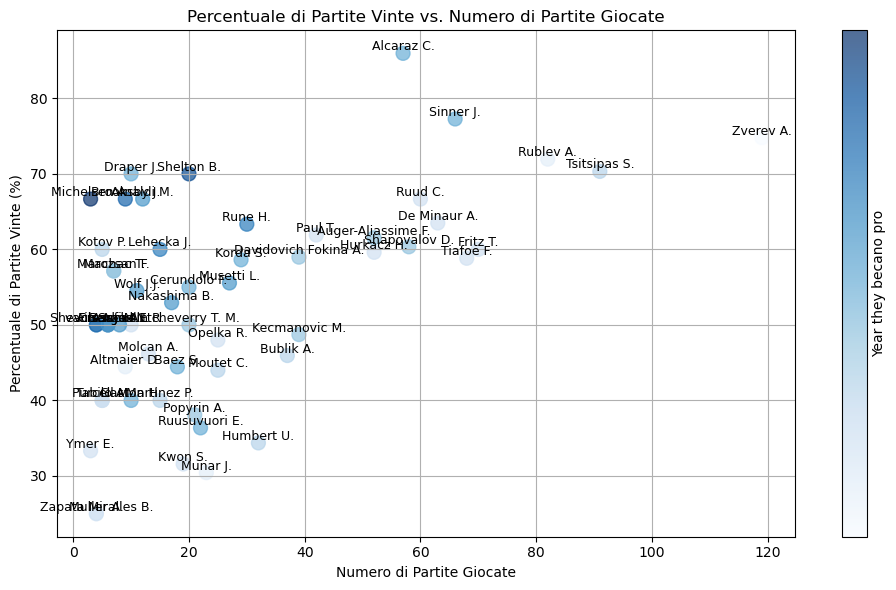

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Trovare i giocatori comuni a tutti e tre i dizionari
giocatori_comuni = set(diz_partite_tot.keys()) & set(diz_vittorie_tot.keys()) & set(pros.keys())

# Filtrare i dati solo per i giocatori comuni
partite_giocate_values = [diz_partite_tot[giocatore] for giocatore in giocatori_comuni]
partite_vinte_values = [diz_vittorie_tot[giocatore] for giocatore in giocatori_comuni]
valori_terzo_dizionario_values = [pros[giocatore] for giocatore in giocatori_comuni]

# Calcolare la percentuale di partite vinte
percentuale_vittorie = [(vinte / giocate) * 100 for vinte, giocate in zip(partite_vinte_values, partite_giocate_values)]

# Normalizzare i valori del terzo dizionario per la scala di colori
min_value = 1950
max_value = 2022
normalized_values = [(v - min_value) / (max_value - min_value) for v in valori_terzo_dizionario_values]

# Creare il grafico scatter con colori personalizzati
plt.figure(figsize=(10, 6))
scatter = plt.scatter(partite_giocate_values, percentuale_vittorie, c=normalized_values, cmap='Blues', alpha=0.7, s=100)

# Aggiungere i nomi dei giocatori accanto ai punti
for i, nome in enumerate(giocatori_comuni):
    plt.text(partite_giocate_values[i], percentuale_vittorie[i], nome, fontsize=9, ha='center', va='bottom')

cbar = plt.colorbar(scatter, ticks=np.arange(min(valori_terzo_dizionario_values), max(valori_terzo_dizionario_values)+1, 1))
cbar.set_label('Year they becano pro')

# Aggiungere titoli e etichette agli assi
plt.title('Percentuale di Partite Vinte vs. Numero di Partite Giocate')
plt.xlabel('Numero di Partite Giocate')
plt.ylabel('Percentuale di Partite Vinte (%)')

# Mostrare il grafico
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_under_1996.png', format='png')
plt.show()


In [188]:
for match in AUS.find():
    if 'Name Formatted' in match['player1']:
        print(match['player1']['Name Formatted'])

Sinner J.
Medvedev D.
Djokovic N.
Zverev A.
Hurkacz H.
Sinner J.
Djokovic N.
Kecmanovic M.
Zverev A.
Borges N.
De Minaur A.
Sinner J.
Fritz T.
Djokovic N.
Zverev A.
Auger-Aliassime F.
Dimitrov G.
Norrie C.
Humbert U.
Paul T.
Korda S.
De Minaur A.
Djokovic N.
Mannarino A.
van Assche L.
Fritz T.
Sinner J.
Machac T.
Ruusuvuori E.
Auger-Aliassime F.
Rune H.
Dimitrov G.
Humbert U.
Fils A.
Borges N.
Kecmanovic M.
Sonego L.
Paul T.
Purcell M.
Zverev A.
Michelsen A.
Norrie C.
Djokovic N.
Eubanks C.
Korda S.
Thompson J.
Monfils G.
Tiafoe F.
Mannarino A.
O'Connell C.
Marozsan F.
Fritz T.
Musetti L.
Kotov P.
Galan D. E.
De Minaur A.
Sinner J.
Gasquet R.
Evans D.
Zverev A.
Ofner S.
Paul T.
McDonald M.
Bublik A.
Rune H.
Giron M.
Purcell M.
Dimitrov G.
Ramos A.
Djere L.
Fils A.
Lajovic D.
Norrie C.
Safiullin R.
Zapata Miralles B.
Hijikata R.
Auger-Aliassime F.
Kecmanovic M.
De Minaur A.
Muller A.
Marterer M.
Humbert U.
Hanfmann Y.
Murray A.
Eubanks C.
Zhang Z.
Tabilo A.
Vukic A.
Altmaier D.
Mannarin

In [180]:
list(US.find({
    '$or':[
        {'player1.Name':'Jannik Sinner', 'player2.Name':'Alexander Zverev'},
        {'player2.Name':'Jannik Sinner', 'player1.Name':'Alexander Zverev'}
    ]
}))

[{'_id': ObjectId('668a9f60b8e1d224ac109562'),
  'match type': '1/8 Final',
  'player1': {'_id': ObjectId('668a9f86b8e1d224ac109a87'),
   'Name': 'Alexander Zverev',
   'Rank': 16,
   'Name Formatted': 'Zverev A.',
   'year': '2023',
   'backhand': 'Two-Handed Backhand',
   'hand': 'Right-Handed',
   'height': '198',
   'turned pro': '2013',
   'weight': '90',
   'year of birth': '1997'},
  'player2': {'_id': ObjectId('668a9f86b8e1d224ac109a7f'),
   'Name': 'Jannik Sinner',
   'Rank': 8,
   'Name Formatted': 'Sinner J.',
   'year': '2023',
   'backhand': 'Two-Handed Backhand',
   'hand': 'Right-Handed',
   'height': '188',
   'turned pro': '2018',
   'weight': '76',
   'year of birth': '2001'},
  'points_p1': ['6', '3', '6', '4', '6'],
  'points_p2': ['4', '6', '2', '6', '3'],
  'winner': 'Zverev A.',
  'year': '2023'},
 {'_id': ObjectId('668a9f60b8e1d224ac109663'),
  'match type': '1/8 Final',
  'player1': {'_id': ObjectId('668a9f86b8e1d224ac109b44'),
   'Name': 'Alexander Zverev',
  

In [301]:
giocatori_comuni=list(giocatori_comuni)
print(giocatori_comuni)

['Shevchenko A.', 'Ruud C.', 'Muller A.', 'Gaston H.', 'Safiullin R.', 'Brooksby J.', 'Lehecka J.', 'Opelka R.', 'Rune H.', 'Munar J.', 'Bublik A.', 'Cobolli F.', 'Altmaier D.', 'van Assche L.', 'Purcell M.', 'Popyrin A.', 'Korda S.', 'Hurkacz H.', 'Shelton B.', 'Draper J.', 'Cerundolo F.', 'Kecmanovic M.', 'Shapovalov D.', 'Sinner J.', 'Borges N.', 'Kotov P.', 'Baez S.', 'Davidovich Fokina A.', 'Navone M.', 'Humbert U.', 'Marozsan F.', 'Tsitsipas S.', 'Musetti L.', 'Nakashima B.', 'De Minaur A.', 'Paul T.', 'Ymer M.', 'Darderi L.', 'Wolf J.J.', 'Tiafoe F.', 'Arnaldi M.', 'Fils A.', 'Kwon S.', 'Zverev A.', 'Zapata Miralles B.', 'Alcaraz C.', 'Etcheverry T. M.', 'Molcan A.', 'Rublev A.', 'Michelsen A.', 'Moutet C.', 'Ymer E.', 'Ruusuvuori E.', 'Fritz T.', 'Tabilo A.', 'Harris L.', 'Auger-Aliassime F.', 'Martinez P.', 'Wu Y.', 'Machac T.', 'Cressy M.']


In [302]:
vittorie_contro_uno={}
for nome in giocatori_comuni:
    result=list(AUS.find({
        'winner': nome, '$or' :[
            {'player1.Name Formatted': nome, 'player2.Rank':1},
            {'player2.Name Formatted': nome, 'player1.Rank':1}
        ]
    }))
    vittorie_contro_uno[nome]=len(result)

In [304]:
for nome in giocatori_comuni:
    result=list(US.find({
        'winner': nome, '$or' :[
            {'player1.Name Formatted': nome, 'player2.Rank':1},
            {'player2.Name Formatted': nome, 'player1.Rank':1}
        ]
    }))
    vittorie_contro_uno[nome]=vittorie_contro_uno[nome]+len(result)

In [305]:
for nome in giocatori_comuni:
    result=list(Rolland.find({
        'winner': nome, '$or' :[
            {'player1.Name Formatted': nome, 'player2.Rank':1},
            {'player2.Name Formatted': nome, 'player1.Rank':1}
        ]
    }))
    vittorie_contro_uno[nome]=vittorie_contro_uno[nome]+len(result)

In [306]:
for nome in giocatori_comuni:
    result=list(Wimbledon.find({
        'winner': nome, '$or' :[
            {'player1.Name Formatted': nome, 'player2.Rank':1},
            {'player2.Name Formatted': nome, 'player1.Rank':1}
        ]
    }))
    vittorie_contro_uno[nome]=vittorie_contro_uno[nome]+len(result)

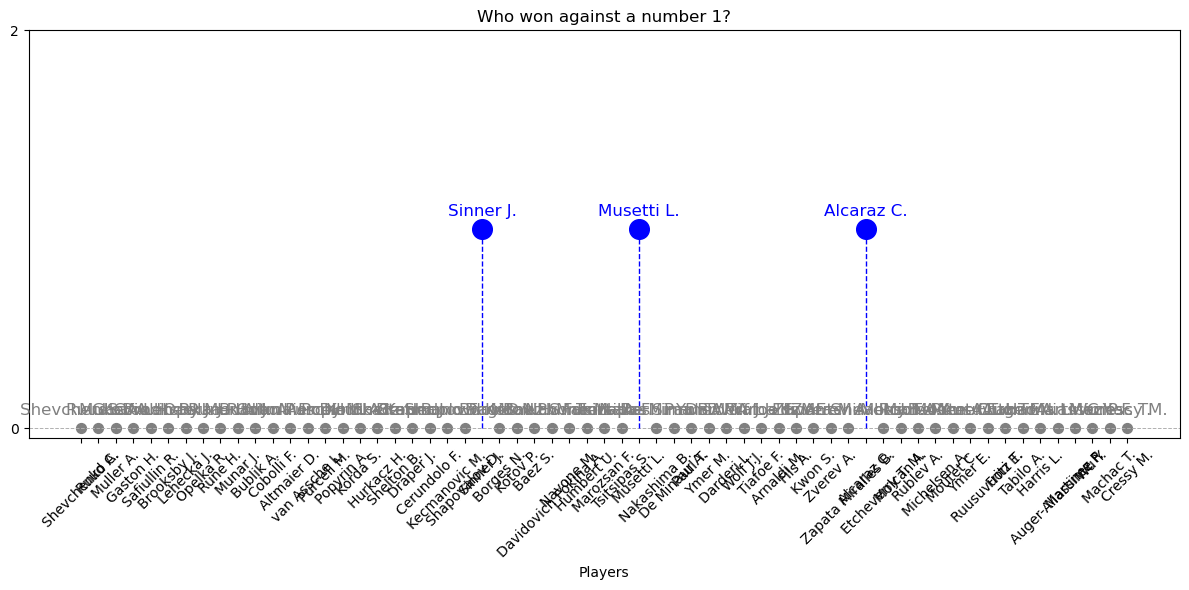

In [320]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nomi = list(vittorie_contro_uno.keys())
valori = list(vittorie_contro_uno.values())

# Determinare i colori e le dimensioni in base ai valori
colori = ['blue' if valore == 1 else 'gray' for valore in valori]
dimensioni = [200 if valore == 1 else 50 for valore in valori]

# Creare il grafico a dispersione
plt.figure(figsize=(12, 6))
for i, (nome, valore) in enumerate(zip(nomi, valori)):
    plt.scatter(i, valore, color=colori[i], s=dimensioni[i])
    plt.plot([i, i], [0, valore], color=colori[i], linestyle='--', linewidth=1)
    plt.text(i, valore + 0.05, nome, ha='center', va='bottom', color=colori[i], fontsize=12)

# Configurare il grafico
plt.xticks(range(len(nomi)), nomi, rotation=45)
plt.yticks([0, 2], ['0', '2'])
plt.xlabel('Players')
plt.ylabel('')
plt.title('Who won against a number 1?')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Mostrare il grafico
plt.tight_layout()
plt.savefig('vittorie_uno.png', format='png')
# Mostriamo il grafico
plt.show()